___
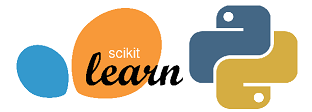
___
# Ejercicio de Regresión Logistica

En este ejercicio, trabajaremos con un conjunto de datos de publicidad falsa, que indica si un usuario de Internet en particular hizo clic en un anuncio en el sitio web de una empresa. Intentaremos crear un modelo que prediga si harán clic o no en un anuncio en función de las características de ese usuario.

Este conjunto de datos contiene las siguientes características:

* 'Daily Time Spent on Site': tiempo consumido en el sitio en minutos
* 'Age': edad del cliente en años
* 'Area Income': Promedio de ingresos del cliente segun área geográfica
* 'Daily Internet Usage': Promedio en minutos al día que el consumidor está en Internet
* 'Ad Topic Line': Titular del anuncio
* 'City': Ciudad del consumidor
* 'Male': Si el consumidor es hombre o no
* 'Country': País de consumidor
* 'Timestamp': Hora a la que el consumidor hizo clic en el anuncio o cerro la ventana
* 'Clicked on Ad': 0 o 1 indica si hizo clic en el Anuncio

## Importar Librerias

**Importa algunas librerias que crees que necesitarás (¡o simplemente impórtalas sobre la marcha!)**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtener los datos
**Lee el archivo advertising.csv y configúralo en un dataframe llamado ad_data.**

In [58]:
ad_data = pd.read_csv('advertising.csv')

**Verifica la cabecera de ad_data**

In [59]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Usa info y describe() en ad_data**

In [60]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [61]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Análisis exploratorio de datos

¡Usemos seaborn para explorar los datos!

¡Intenta recrear los gráficos que se muestran a continuación!

**Crea un histograma de la edad**

Text(0.5, 0, 'Age')

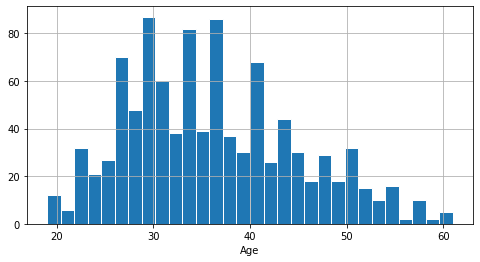

In [62]:
#sns.displot(ad_data['Age'].dropna(), kde=False,color='tab:blue',bins=30)
ad_data['Age'].hist(bins=30,color='tab:blue',figsize=(8,4),edgecolor="white", linewidth=1)
plt.xlabel("Age")

**Crea un jointplot mostrando Area Income versus Age.**

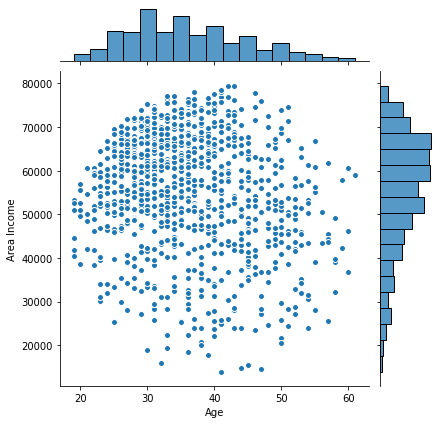

In [63]:
sns.jointplot(data=ad_data, x='Age', y='Area Income', edgecolor="white", linewidth=1)

**Crea un jointplot mostrando la distribucion kde de "Daily Time spent on Site" vs. "Age".**

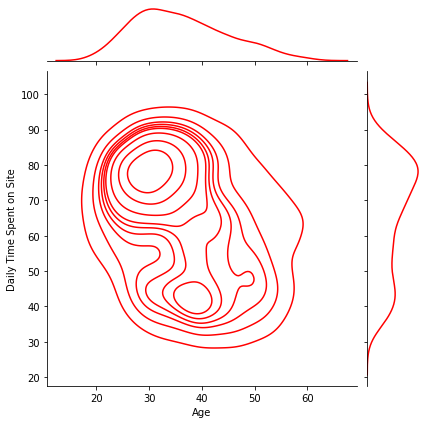

In [64]:
 sns.jointplot(data=ad_data, x='Age', y='Daily Time Spent on Site', kind="kde",color="red")

**Crea un jointplot de 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

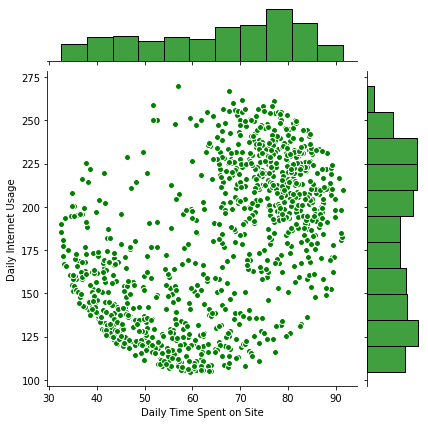

In [65]:
sns.jointplot(data=ad_data, x='Daily Time Spent on Site', y='Daily Internet Usage', color='green', edgecolor="white", linewidth=1)

**Finalmente, crea un pairplot con el parametro 'hue' definido por la columna 'Clicked on Ad'.**

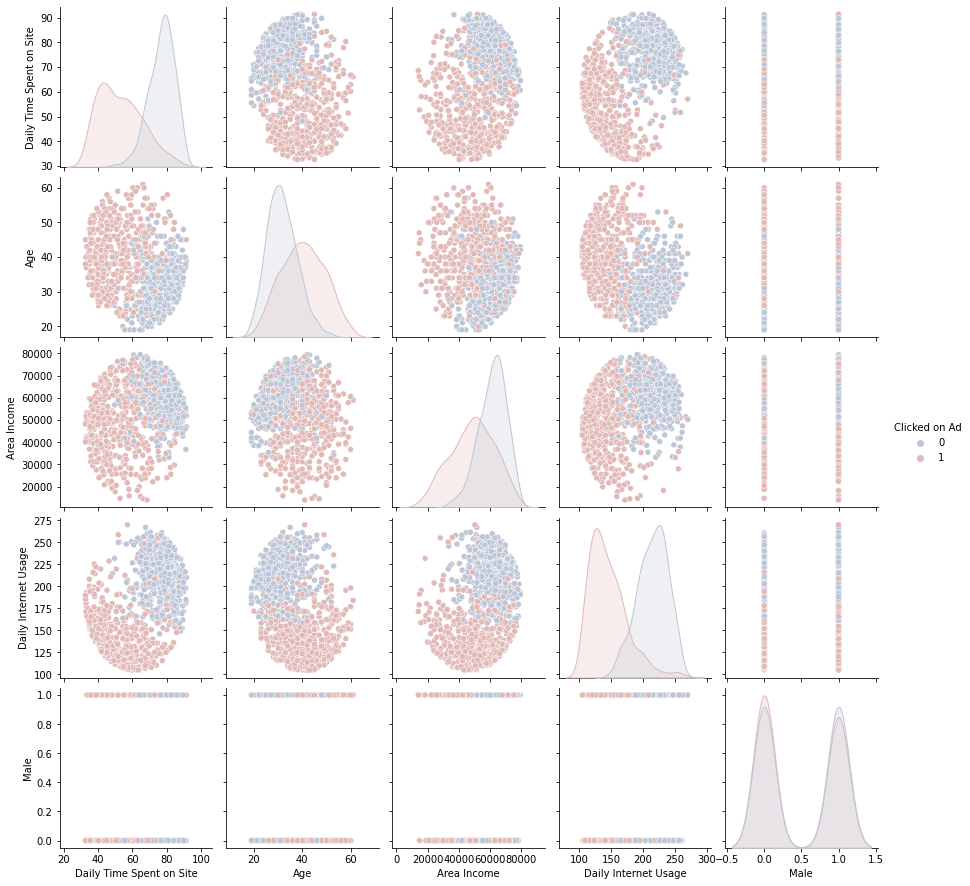

In [66]:
sns.pairplot(data=ad_data, hue='Clicked on Ad',palette="vlag")

# Regresión Logistica

¡Ahora es el momento de hacer una division de datos de entrenamiento y prueba para nuestro modelo!

¡Aquí tendrás la libertad de elegir las columnas en las que quieras entrenar!

**Divide los datos en conjunto de entrenamiento y conjunto de prueba usando train_test_split**

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [56]:
ad_data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis=1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    ad_data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis=1),
    ad_data['Clicked on Ad'], test_size=0.30, random_state=101)

**Entrena y ajusta un modelo de regresión logística en el conjunto de entrenamiento.**

In [71]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000) #Parametros utilizados para problemas con multiclases

In [72]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## Predicciones y evaluaciones
**Ahora prediga valores para los datos de prueba.**

In [73]:
predictions = logmodel.predict(X_test)

**Crea un reporte de clasificación para el modelo.**

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



**Precision** es la proporción de predicciones de esa clase que son verdaderas. Entonces, el 86% de las predicciones son verdaderas para la clase 0 predicha (no dio clic en el Ad) y 96% de las predicciones son verdaderas para la clase 1 predicha (dio clic en el Ad)

**Recall** es la proporción de verdaderos positivos que se identifican como tales. Esto significa que su modelo está identificando correctamente el 96% de la clase 0, pero solo el 85% de la clase 1.

**F1-score** solo es útil si Precision y Recall son similares.

**support** El soporte es el número de apariciones reales de la clase en el conjunto de datos especificado, es decir, el número de muestras con la respuesta verdadera que se encuentran en esa clase. 


## Buen trabajo!